In [1]:
import math
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [29]:
# 0. Cargar los datos de estatura y peso
url = 'http://wiki.stat.ucla.edu/socr/index.php?title=SOCR_Data_Dinov_020108_HeightsWeights&oldid=12529'

height_weight_df = pd.read_html(url)[1][['Height(Inches)','Weight(Pounds)']]

In [31]:
# 1. Count records in the dataframe

height_weight_df.describe()

,Height(Inches),Weight(Pounds)
count,200.000000,200.000000
mean,67.949800,127.221950
std,1.940363,11.960959
min,63.430000,97.900000
25%,66.522500,119.895000
50%,67.935000,127.875000
75%,69.202500,136.097500
max,73.900000,158.960000


In [33]:

# 2. Crear una regresion lineal con estatura como variable explicatoria y peso como variable explicada
X = height_weight_df[['Height(Inches)']]
y = height_weight_df['Weight(Pounds)']

# Crear el modelo de regresión lineal
model = linear_model.LinearRegression()

# Entrenar el modelo
model.fit(X, y)



LinearRegression()

In [34]:
# 3. Hallar el intercepto

intercept = model.intercept_
coef = model.coef_
print(f"Intercepto: {intercept}")
print(f"Coeficiente: {coef[0]}")


Intercepto: -106.02770644878126
Coeficiente: 3.432676129271628


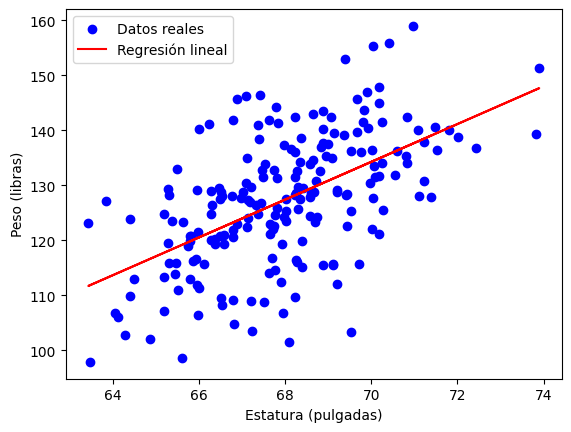

In [36]:
# 4. Hacer la grafica
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X, model.predict(X), color='red', label='Regresión lineal')
plt.xlabel('Height(Inches)')
plt.ylabel('Weight(Pounds)')
plt.legend()

In [39]:
# 5. Hallar correlación y valor p
correlation = pearsonr(height_weight_df['Height(Inches)'], height_weight_df['Weight(Pounds)'])
p_value = correlation[1]
print(f"Correlación: {correlation[0]}")
print(f"Valor p: {p_value}")


# 6. Interpretar el valor p
if p_value < 0.05:
    print("El valor p es menor a 0.05, por lo tanto, rechazamos la hipótesis nula. Esto indica que hay una relación estadísticamente significativa entre la estatura y el peso.")
else:
    print("El valor p no es menor a 0.05, por lo tanto, no rechazamos la hipótesis nula. Esto indica que no hay una relación estadísticamente significativa entre la estatura y el peso.")

Correlación: 0.5568647346122995
Valor p: 1.1029015151265877e-17
El valor p es menor a 0.05, por lo tanto, rechazamos la hipótesis nula. Esto indica que hay una relación estadísticamente significativa entre la estatura y el peso.
